In [1]:
import pandas as pd
import numpy as np

rating_data = pd.read_csv("../../csv/after_pre/total_survey_221129_2.csv")
webtoon_data = pd.read_csv("../../csv/after_pre/drop_webtoon_preprocessing_221130.csv",encoding="cp949",index_col=0)

In [2]:
#webtoon_title -> title (for merge)
rating_data = rating_data.rename(columns={'webtoon_title':'title'})

In [3]:
webtoon_data.drop(['likes','intro','first_register_date','last_register_date','author','status','episodes','age','rate'],axis=1,inplace=True)

In [4]:
usr_webtoon_data = pd.merge(rating_data,webtoon_data,on="title")
usr_webtoon_data = usr_webtoon_data.drop(['webtoon_num','genre1_pre','genre2_pre'],axis=1)

In [5]:
usr_webtoon_data

,user,title,webtoon_ratings
0,1,리트리츠,6.0
1,1,마루는 강쥐,5.0
2,50,마루는 강쥐,5.0
3,56,마루는 강쥐,5.0
4,57,마루는 강쥐,6.0
...,...,...,...
1170,98,로또 황녀님,5.0
1171,99,괴물공작의 딸,4.0
1172,99,더 퀸즈,5.0
1173,99,밥 먹고 갈래요?,5.0


In [6]:
#make pivot table
usr_webtoon_pivot = usr_webtoon_data.pivot_table('webtoon_ratings',index="user",columns='title')
usr_webtoon_pivot.head()

title,100,10월 28일,12차원 소년들,"17살, 그 여름날의 기적",1초,1학년 9반,2011 미스테리 단편,2012 지구가 멸망한다면?,2013 전설의고향,2015 사이,...,호랑이형님,호랭총각,호러전파상,화산귀환,화이트멜로우,회춘,후레자식,후유증,후유증 2,히어로 킬러
user,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#NaN -> 0.0
usr_webtoon_pivot = usr_webtoon_pivot.fillna(0)
usr_webtoon_pivot

title,100,10월 28일,12차원 소년들,"17살, 그 여름날의 기적",1초,1학년 9반,2011 미스테리 단편,2012 지구가 멸망한다면?,2013 전설의고향,2015 사이,...,호랑이형님,호랭총각,호러전파상,화산귀환,화이트멜로우,회춘,후레자식,후유증,후유증 2,히어로 킬러
user,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [8]:
usr_webtoon_pivot.shape

(95, 571)

In [9]:
#column <-> row
webtoon_usr_pivot = usr_webtoon_pivot.values.T
webtoon_usr_pivot.shape

(571, 95)

In [10]:
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=12)
matrix = SVD.fit_transform(webtoon_usr_pivot)
matrix.shape

(571, 12)

In [11]:
matrix[0]

array([ 8.61776539e-01,  1.16063250e-01, -4.16239636e-01, -2.19540015e-01,
       -1.39047566e-02, -1.02790844e-01, -1.52732401e-02, -6.52797651e-05,
        6.63910585e-02, -1.73111144e-03, -5.95265494e-03, -5.36351871e-03])

In [12]:
corr = np.corrcoef(matrix)
corr.shape

(571, 571)

<AxesSubplot:>

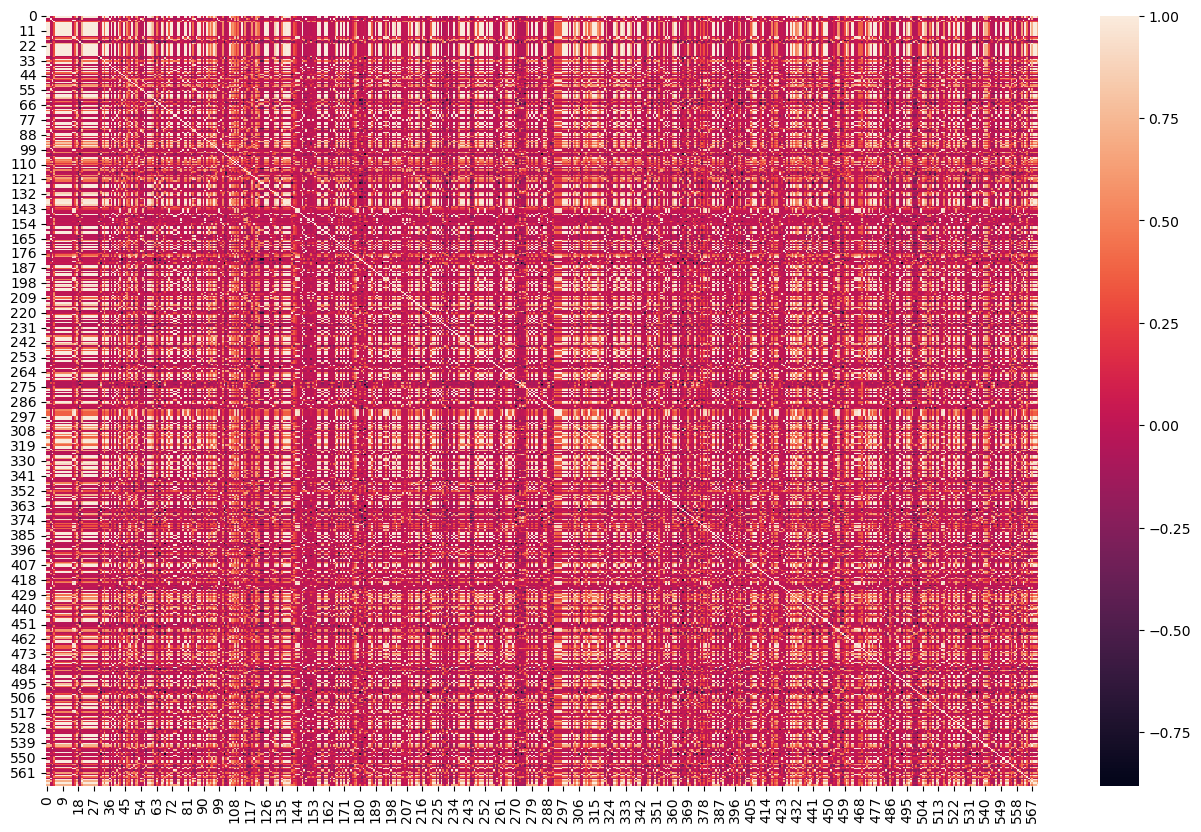

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
sns.heatmap(corr)

In [14]:
webtoon_title = usr_webtoon_pivot.columns
webtoon_title_list = list(webtoon_title)

In [21]:
def recommand_movie(title):
    target = webtoon_title_list.index(title)
    corr_target = corr[target]
    result = list(webtoon_title[(corr_target>=0.80)])[:200]
    
    return result

In [25]:
recommand_movie("별이삼샵")

['가비지타임', '라스트 서브미션', '별이삼샵', '스쿨홀릭']